# House Price Prediction Regression Project

## Project goal--- (predict the price of a house by i'ts feature. if you are a buyer or seller of the house but you don't know the exact price of the house, so supervised machine learning regression algorithm can help you to predict the price of a house just providing the feature of that house)

# Load Modules/Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar

# for the ordinal encoding
from pandas.api.types import CategoricalDtype
# for feature scaling
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
# to see all the columns and row of the dataframe withoutht hiding the

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
shape_train=print(df_train.shape)
shape_test=print(df_test.shape)


(1460, 81)
(1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Know your data


# Data Integration

In [6]:
df=pd.concat([df_train,df_test])
print("Shape of the integrated data is",df.shape)

Shape of the integrated data is (2919, 81)


# Get the information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [8]:
# to see the total names of the columns which contains the datatype as integer
int_features=df.select_dtypes(include=["int64"]).columns
print("Total number of integer features:", int_features.shape[0])
print("integer features are in ist form as ", int_features.tolist())

Total number of integer features: 26
integer features are in ist form as  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [9]:
float_features=df.select_dtypes(include=["float64"]).columns
print("Total number of float features:", float_features.shape[0])
print("float features are in ist form as ", float_features.tolist())

Total number of float features: 12
float features are in ist form as  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [10]:
obj_features=df.select_dtypes(include=["object"]).columns
print("Total number of categorical features:", obj_features.shape[0])
print("categorical features are in ist form as ", obj_features.tolist())

Total number of categorical features: 43
categorical features are in ist form as  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the statistical information of the numerical feature

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
df.describe().shape

(8, 38)

In [13]:
# Set index as ID column
df= df.set_index("Id")

In [14]:
null_count= df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [15]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## Drop columns

In [16]:
miss_values=null_percent[null_percent>50]
miss_values

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [17]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [18]:
missing_value_feature= null_percent[null_percent>0]
print("total missing value features=", len(missing_value_feature))

total missing value features= 35


In [19]:
missing_value_feature

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [20]:
cat_na_feat=missing_value_feature[missing_value_feature.keys().isin(obj_features)]
print("total number of categorical features are:", len(obj_features))
cat_na_feat

total number of categorical features are: 43


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [21]:
int_na_feat=missing_value_feature[missing_value_feature.keys().isin(int_features)]
print("total number of integer features are:", len(int_features))
int_na_feat

total number of integer features are: 26


Series([], dtype: float64)

In [22]:
float_na_feat=missing_value_feature[missing_value_feature.keys().isin(float_features)]
print("total number of float features are:", len(float_features))
float_na_feat

total number of float features are: 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## handling MSZoning = 0.137033

In [23]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

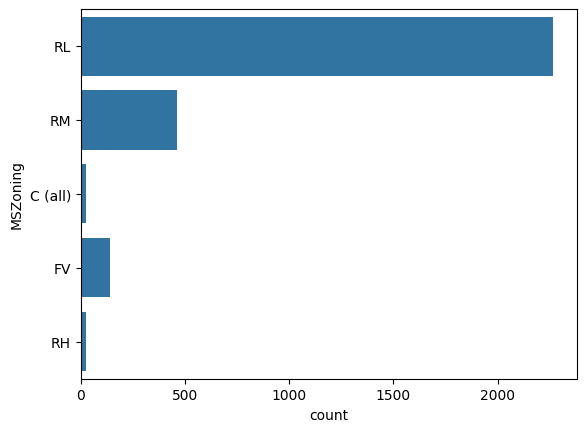

In [24]:
sns.countplot(df["MSZoning"])

In [25]:
# now we will create the copy of theoriginal form and do the changes in the copied version not in original one
df_mvi=df.copy()
df_mvi.shape
# here comes up the features as 80 because we have taken the id as an index 

(2919, 80)

In [26]:
# we are going to replace the null values of the mszoning with the mode value of it
mszoning_mode=df["MSZoning"].mode()[0]
df_mvi["MSZoning"] = df_mvi["MSZoning"].fillna(mszoning_mode)
df_mvi["MSZoning"].isnull().sum()

np.int64(0)

<Axes: xlabel='count', ylabel='MSZoning'>

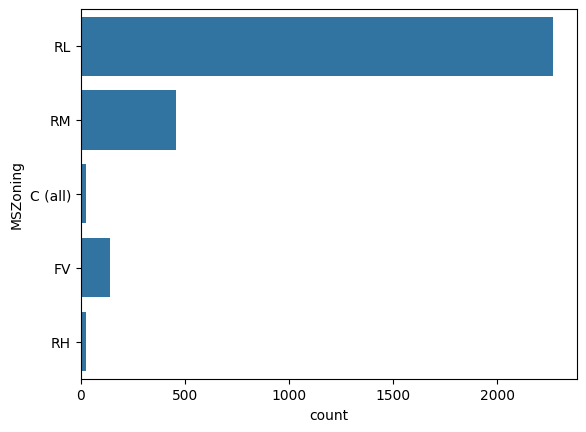

In [27]:
sns.countplot(df_mvi["MSZoning"])

In [28]:
# to  see the old and new graph side by side we can create the function as follows
def oldnewcountplot(df,df_new,feature):
    # 121= 1 row , 2 column , 1st pic print
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("old")
    # 122= 1 row , 2 column , 2nd pic print
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("new")

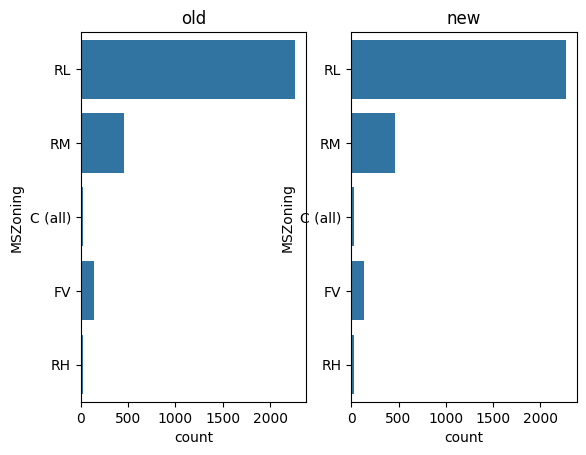

In [29]:
oldnewcountplot(df,df_mvi,"MSZoning")

## handling alley

In [30]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Alley'>

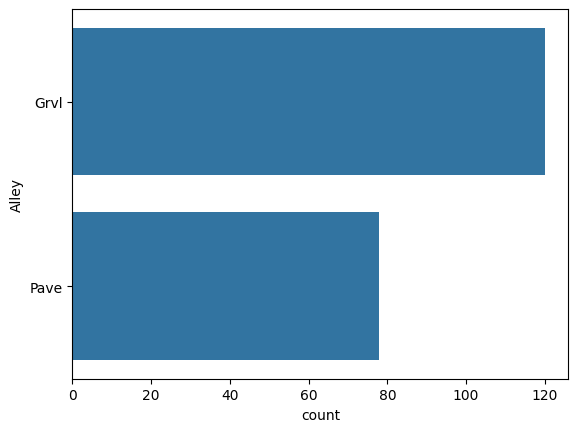

In [31]:
sns.countplot(df["Alley"])

In [32]:
Alley="NA"
df_mvi["Alley"] = df_mvi["Alley"].fillna(mszoning_mode)
df_mvi["Alley"].isnull().sum()

np.int64(0)

<Axes: xlabel='count', ylabel='Alley'>

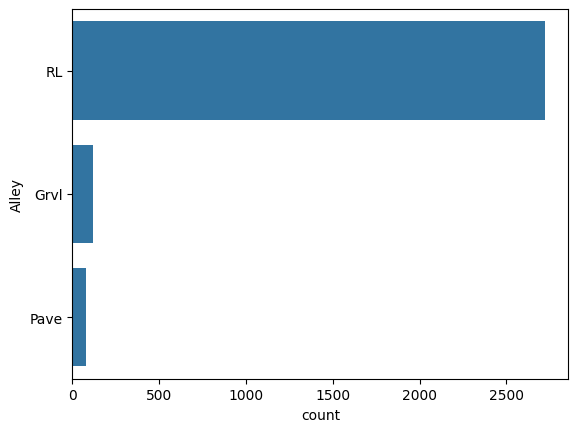

In [33]:
sns.countplot(df_mvi["Alley"])

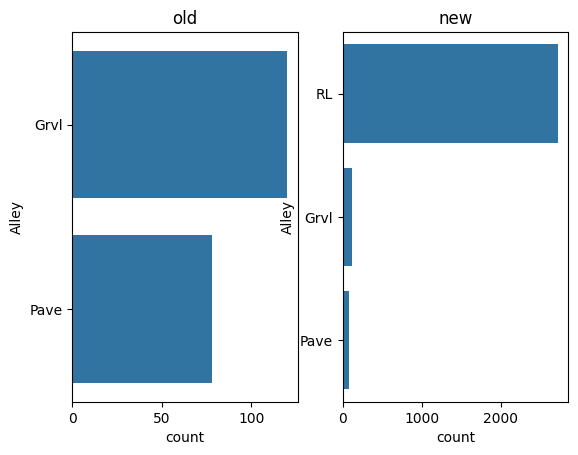

In [34]:
oldnewcountplot(df,df_mvi,"Alley")

In [35]:
## for the 

In [36]:
def histplot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)
    

C:\Users\kriti\AppData\Local\Temp\ipykernel_2328\1943382955.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


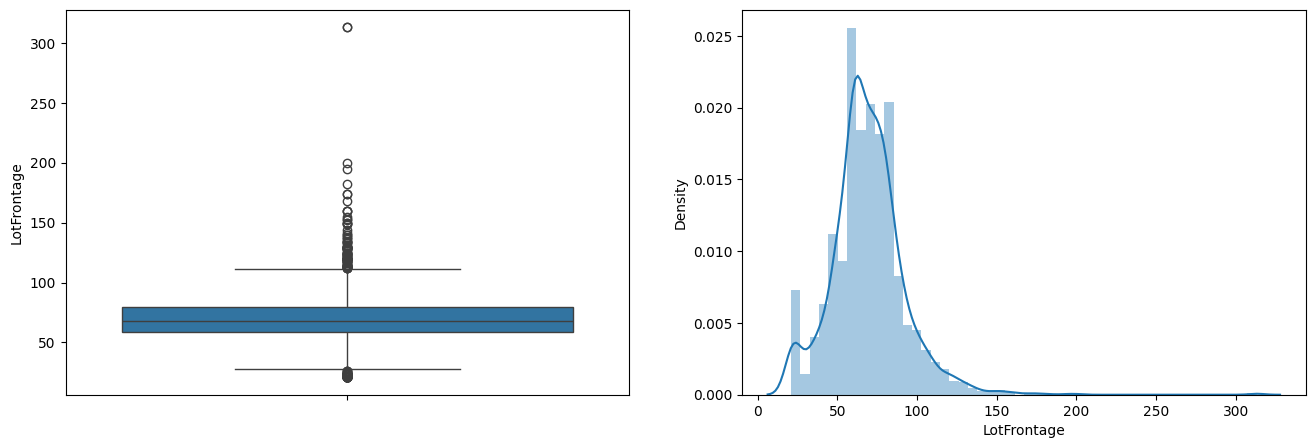

In [37]:
histplot(df["LotFrontage"])
# as from the below graph we can see that its a right skewed as in box plt its vertically shown and in hist its shown clearly 
# now taking the meanvalue to fill the blanks

In [38]:
losfrotage_mean=df["LotFrontage"].mean()
losfrotage_mean

np.float64(69.30579531442663)

In [39]:
df_mvi["LotFrontage"].replace(np.nan,losfrotage_mean)
df_mvi["LotFrontage"].isnull().sum()

np.int64(486)

## handling utilities


In [40]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [41]:
utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"] = df_mvi["Utilities"].fillna(utilities_mode)
df_mvi["Utilities"].isnull().sum()

np.int64(0)

## handling  Exterior1st-0.034258 Exterior2nd-0.034258

In [42]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [43]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [44]:
exterior1st_mode=df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"] = df_mvi["Exterior1st"].fillna(exterior1st_mode)
print("for first",df_mvi["Exterior1st"].isnull().sum())

exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"] = df_mvi["Exterior2nd"].fillna(exterior2nd_mode)
print("for second",df_mvi["Exterior2nd"].isnull().sum())

for first 0
for second 0


##  handling MasVnrType-60.500171 MasVnrArea-0.787941


In [45]:
df["MasVnrType"].value_counts()
# its categorical

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [46]:
VnrType_mode=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"] = df_mvi["MasVnrType"].fillna(VnrType_mode)
df_mvi["MasVnrType"].isnull().sum()

np.int64(0)

C:\Users\kriti\AppData\Local\Temp\ipykernel_2328\1943382955.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


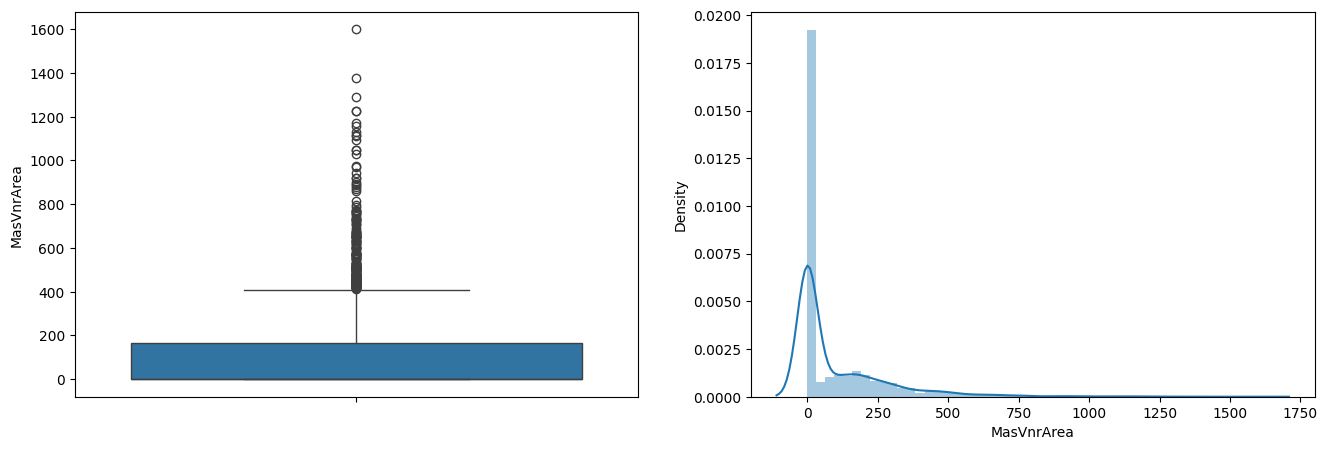

In [47]:
# MasVnrArea isa numerical so we will visualize it accordingly
# its numerical
histplot(df["MasVnrArea"])
# its right skewed

In [48]:
# in our area fron the merged data frame we can see that most of the values are zero so we can fill them by the zero only
VnrArea_const=0
df_mvi["MasVnrArea"] = df_mvi["MasVnrArea"].fillna(VnrArea_const)
df_mvi["MasVnrArea"].isnull().sum()

np.int64(0)

## Handling basement

In [49]:
cat_bsmt_feat=["BsmtQual" ,        
"BsmtCond" ,      
"BsmtExposure",     
"BsmtFinType1" ,    
"BsmtFinType2"] 

num_bsmt_feat=["BsmtFinSF2",      
"BsmtUnfSF" ,   
"TotalBsmtSF"  ,   
"BsmtFullBath",     
"BsmtHalfBath"]     

In [50]:
for feat in cat_bsmt_feat:
    print(f"value count of {feat}: {df[feat].value_counts()}")

value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [51]:
for feat in cat_bsmt_feat:
    df_mvi[feat] = df_mvi[feat].replace(np.nan, "NA")

In [52]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

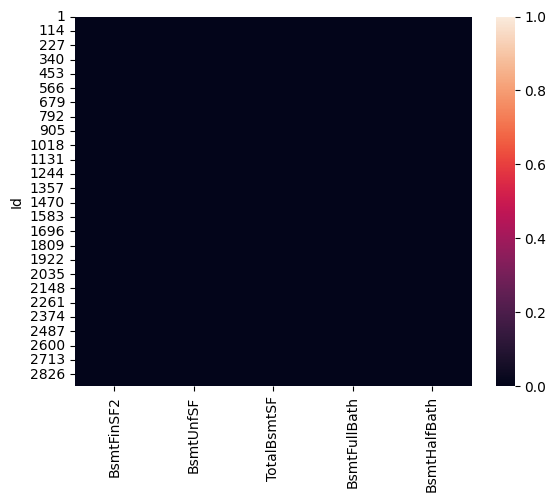

In [53]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [54]:
df[num_bsmt_feat].isnull().sum()

BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [55]:
for feat in num_bsmt_feat:
    df_mvi[feat] = df_mvi[feat].replace(np.nan, "NA")

In [56]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## handling Kitchen and Electrical both are categorical

In [57]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [58]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [59]:
electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"]=df_mvi["Electrical"].fillna(electrical_mode)
df_mvi["Electrical"].isnull().sum()

np.int64(0)

In [60]:
kitchen_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].fillna(kitchen_mode)
df_mvi["KitchenQual"].isnull().sum()

np.int64(0)

## handling remaining categorical features 

In [61]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [62]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [63]:
functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"]=df_mvi["Functional"].fillna(functional_mode)
df_mvi["Functional"].isnull().sum()

np.int64(0)

In [64]:
SaleType_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"]=df_mvi["SaleType"].fillna(SaleType_mode)
df_mvi["SaleType"].isnull().sum()

np.int64(0)

In [65]:
df_mvi["FireplaceQu"]=df_mvi["FireplaceQu"].replace(np.nan,"NA")
df_mvi["FireplaceQu"].isnull().sum()

np.int64(0)

In [66]:
df_mvi["PoolQC"]=df_mvi["PoolQC"].replace(np.nan,"NA")
df_mvi["PoolQC"].isnull().sum()

np.int64(0)

In [67]:
df_mvi["Fence"]=df_mvi["Fence"].replace(np.nan,"NA")
df_mvi["Fence"].isnull().sum()

np.int64(0)

In [68]:
df_mvi["MiscFeature"]=df_mvi["MiscFeature"].replace(np.nan,"NA")
df_mvi["MiscFeature"].isnull().sum()

np.int64(0)

## Handling garage features

In [69]:
cat_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]
num_feat=["GarageCars","GarageArea","GarageYrBlt"]
concat=df[cat_feat+num_feat]
concat[concat.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea,GarageYrBlt
Id,,,,,,,
40,NaN,NaN,NaN,NaN,0.0,0.0,NaN
49,NaN,NaN,NaN,NaN,0.0,0.0,NaN
79,NaN,NaN,NaN,NaN,0.0,0.0,NaN
89,NaN,NaN,NaN,NaN,0.0,0.0,NaN
90,NaN,NaN,NaN,NaN,0.0,0.0,NaN
100,NaN,NaN,NaN,NaN,0.0,0.0,NaN
109,NaN,NaN,NaN,NaN,0.0,0.0,NaN
126,NaN,NaN,NaN,NaN,0.0,0.0,NaN
128,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [70]:
GarageType="NA"
df_mvi["GarageType"]=df_mvi["GarageType"].replace(np.nan,"NA")
df_mvi["GarageType"].isnull().sum()

np.int64(0)

In [71]:
GarageFinish="NA"
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].replace(np.nan,"NA")
df_mvi["GarageFinish"].isnull().sum()

np.int64(0)

In [72]:
GarageQual="NA"
df_mvi["GarageQual"]=df_mvi["GarageQual"].replace(np.nan,"NA")
df_mvi["GarageQual"].isnull().sum()

np.int64(0)

In [73]:
GarageCond="NA"
df_mvi["GarageCond"]=df_mvi["GarageCond"].replace(np.nan,"NA")
df_mvi["GarageCond"].isnull().sum()

np.int64(0)

In [74]:
# now trying with the loop for the numerical values
# we can do this seperately too but here we used loop to do all these in a single go
for featt in num_feat:
    df_mvi[featt]=df_mvi[featt].fillna(0)
df_mvi[featt].isnull().sum()

np.int64(0)

In [75]:
# for checking that working of the loop is fine or not 
df_mvi["GarageArea"].isnull().sum()


np.int64(0)

In [76]:
df_mvi.isnull().any(axis=1).sum()

np.int64(1718)

# Feature Transformation
## Convert Numerical Feature to Categorical Feature

In [77]:
for_num_conv=["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat} : data type={df_mvi[feat].dtype}")

MSSubClass : data type=int64
YearBuilt : data type=int64
YearRemodAdd : data type=int64
GarageYrBlt : data type=float64
MoSold : data type=int64
YrSold : data type=int64


In [78]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [79]:
# here in month sold we canwrite the name of the month instead of the numrical value
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [80]:
df_mvi["MoSold"] = df_mvi["MoSold"].astype(int)
df_mvi["MoSold"] = df_mvi["MoSold"].map(lambda x: calendar.month_abbr[x])

In [81]:
# calendar.month_abbr[12]
# calendar module works as 
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [82]:
for feat in for_num_conv:
    df_mvi[feat]=df_mvi[feat].astype(str)
# by this all the other columns will also be converted in the string format 

In [83]:
for feat in for_num_conv:
    print(f"{feat} : data type={df_mvi[feat].dtype}")
# to check weather all the in object datatypeor not now

MSSubClass : data type=object
YearBuilt : data type=object
YearRemodAdd : data type=object
GarageYrBlt : data type=object
MoSold : data type=object
YrSold : data type=object


# Convert categorical feature into numerical feature 
## Ordinal Encoding

In [84]:
ordinal_end_var=[
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"
]
print("total number of feature to convert ordinal numerical format:",len(ordinal_end_var))

total number of feature to convert ordinal numerical format: 18


In [85]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

# here in output it has converted the feature into the numerical format as decided

In [86]:
# same as above we will be converting the all of them to the numerical 
df_mvi["ExterCond"]=df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtQual"]=df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes
df_mvi["BsmtFinType1"]=df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinSF1"]=df_mvi["BsmtFinSF1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType2"]=df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["HeatingQC"]=df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["FireplaceQu"]=df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageQual"]=df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageCond"]=df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["PoolQC"]=df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA","Unf","RFn","Fin"],ordered=True)).cat.codes
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes
df_mvi["Utilities"]=df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO","NoSeWa","NoSewr","AllPub"],ordered=True)).cat.codes



In [87]:
df_mvi.info()
# here fro the below information the conversion is done in the numerical form as int datatype is written in front of them but most of them are still in object form will be converting them too

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [88]:
df_mvi.shape

(2919, 80)

# One Hot Encoding nominal categorical data

In [89]:
df_encode=df_mvi.copy()
object_features=df_encode.select_dtypes(include="object").columns.tolist()
print("total number of object datatype features",len(object_features))
print("features\n:",object_features)


total number of object datatype features 37
features
: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [90]:
print("before",df_encode.shape)
df_encode = pd.get_dummies(
    df_encode,
    columns=object_features,
    prefix=object_features,
    drop_first=True
)
print("after",df_encode.shape)


before (2919, 80)
after (2919, 2979)


In [91]:
df_encode.head(5)

LotFrontage  LotArea  Utilities  OverallQual  OverallCond  MasVnrArea  \
Id                                                                          
1          65.0     8450          3            7            5       196.0   
2          80.0     9600          3            6            8         0.0   
3          68.0    11250          3            7            5       162.0   
4          60.0     9550          3            7            5         0.0   
5          84.0    14260          3            8            5       350.0   

    ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
Id                                                                         
1           3          2         4         3             1             6   
2           2          2         4         3             4             5   
3           3          2         4         3             2             6   
4           2          2         3         4             1             5   
5           3          2         4         3             3             6   

    BsmtFinSF1  BsmtFinType2  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                          
1           -1             1          4       856       854             0   
2           -1             1          4      1262         0             0   
3           -1             1          4       920       866             0   
4           -1             1          3       961       756             0   
5           -1             1          4      1145      1053             0   

    GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
Id                                                                           
1        1710         2         1             3             1            3   
2        1262         2         0             3             1            2   
3        1786         2         1             3             1            3   
4        1717         1         0             3             1            3   
5        2198         2         1             4             1            3   

    TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageFinish  \
Id                                                                    
1              8           7           0            0             2   
2              6           7           1            3             2   
3              6           7           1            3             2   
4              7           7           1            4             1   
5              9           7           1            3             2   

    GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
Id                                                                           
1          2.0       548.0           3           3           2           0   
2          2.0       460.0           3           3           2         298   
3          2.0       608.0           3           3           2           0   
4          3.0       642.0           3           3           2           0   
5          3.0       836.0           3           3           2         192   

    OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
Id                                                                         
1            61              0          0            0         0       0   
2             0              0          0            0         0       0   
3            42              0          0            0         0       0   
4            35            272          0            0         0       0   
5            84              0          0            0         0       0   

    MiscVal  SalePrice  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
Id                                                                       
1         0   208500.0           False           False           False   
2         0   181500.0           False      

In [92]:
df_encode.info()
# as from below its clear that object datatype columns are vanished that means converted into integer

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 2979 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(2936), float64(5), int64(20), int8(18)
memory usage: 8.8 MB


In [93]:
df_encode.select_dtypes(include="object").columns.tolist()
# or can see by this as the object datatype listr is empty 

[]

## split the data for training and testing

In [94]:
df_encode.shape

(2919, 2979)

In [95]:
len_train=df_train.shape[0]
len_train

1460

In [96]:
# from training we will remove the salesprice column as that is dependent
X_train=df_encode[:len_train].drop("SalePrice",axis=1)
y_train=df_encode["SalePrice"][:len_train]
X_test=df_encode[len_train:].drop("SalePrice",axis=1)
print("Shape of X_train data:",X_train.shape)
print("Shape of y_train data:",y_train.shape)

print("Shape of X_test data:",X_test.shape)

Shape of X_train data: (1460, 2978)
Shape of y_train data: (1460,)
Shape of X_test data: (1459, 2978)


## Feature scaling
### from this we will be getting the data in a scalar format

In [97]:
# You are creating a scaling machine
sc=StandardScaler()
# The scaler is learning from training data only.
sc.fit(X_train)
# formula for the standard scalar is z=(x-u)/s  [u=mean , s= standard daviation]

# Now the scaler applies what it learned to training data
X_train= sc.transform(X_train)
# Same scaler is used on test data.
X_test=sc.transform(X_test)
# now it will give the output in the array format 

In [98]:
X_train[:3,:]

array([[-0.20803433, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.40989452, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08444856,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]], shape=(3, 2978))

In [99]:
X_test[:3,:]

array([[ 0.40989452,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45108977,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.16272298,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]], shape=(3, 2978))

## Train ML model

In [100]:
!pip install xgboost

In [101]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [102]:
svr=SVR()
lr= LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
ir=IsotonicRegression()
mlpr=MLPRegressor()
xgbr=XGBRegressor()

In [103]:
models={"a":["LinearRegression",lr],
        "b":["SVR",svr],
        "c":["SGDRegressor",sgdr],
        "d":["KNeighborsRegressor",knr],
        "e":["GaussianProcessRegressor",gpr],
        "f":["DecisionTreeRegressor",dtr],
        "g":["GradientBoostingRegressor",gbr],
        "h":["RandomForestRegressor",rfr],
        # "i":["IsotonicRegression",ir],
        # "j":["MLPRegressor",mlpr],
        "k":["XGBRegressor",xgbr]
       }
    

In [104]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer,r2_score

def test_model(model, X_train=X_train,y_train=y_train):
    cv=KFold(n_splits=7, shuffle=True,random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [105]:
X_train = np.nan_to_num(X_train)

In [106]:
models_score=[]
for model in models:
    # 0= name of the model training as the form is dictionary
    print("training model:", models[model][0])
    score=test_model(models[model][1],X_train,y_train)
    print("Score of model :", score)
    models_score.append([models[model][0],score[0]])


training model: LinearRegression
Score of model : [np.float64(0.6782315521934422)]
training model: SVR
Score of model : [np.float64(-0.05241723876362957)]
training model: SGDRegressor
Score of model : [np.float64(-3031691031.882248)]
training model: KNeighborsRegressor
Score of model : [np.float64(-0.3968555482945867)]
training model: GaussianProcessRegressor
Score of model : [np.float64(-5.399785870867078)]
training model: DecisionTreeRegressor
Score of model : [np.float64(0.7192752182985684)]
training model: GradientBoostingRegressor
Score of model : [np.float64(0.8681093752540514)]
training model: RandomForestRegressor
Score of model : [np.float64(0.8423780008619491)]
training model: XGBRegressor
Score of model : [np.float64(0.852085127763614)]


In [107]:
models_score

[['LinearRegression', np.float64(0.6782315521934422)],
 ['SVR', np.float64(-0.05241723876362957)],
 ['SGDRegressor', np.float64(-3031691031.882248)],
 ['KNeighborsRegressor', np.float64(-0.3968555482945867)],
 ['GaussianProcessRegressor', np.float64(-5.399785870867078)],
 ['DecisionTreeRegressor', np.float64(0.7192752182985684)],
 ['GradientBoostingRegressor', np.float64(0.8681093752540514)],
 ['RandomForestRegressor', np.float64(0.8423780008619491)],
 ['XGBRegressor', np.float64(0.852085127763614)]]

In [108]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [109]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [110]:
y_pred = best_model.predict(X_test)


In [111]:
best_model.score(X_train, y_train)


0.9613809510445456

## Testing the model

In [124]:
# Removes target column SalePrice
feature_names = df_encode.drop("SalePrice", axis=1).columns

# Shows what feature index 0 and 1 mean
print(feature_names[0], feature_names[1])


LotFrontage LotArea


In [130]:
custom_house = X_train[0].copy()
# Safe way to create custom input

In [131]:
custom_house[0] = 80     # example feature
# Sets LotFrontage = 80

custom_house[1] = 9000   # example feature
# Sets LotArea = 9000

In [132]:
# Converts data into 1 row format for model
custom_house = custom_house.reshape(1, -1)

# Model predicts house price
price = best_model.predict(custom_house)

# Prints the predicted price
print("Predicted House Price:", price[0])


Predicted House Price: 224278.48530435763


In [135]:
best_model.score(X_test, y_pred)


1.0

In [136]:
actual = y_pred[0]
predicted = best_model.predict(X_test[0].reshape(1,-1))[0]

print("Actual:", actual)
print("Predicted:", predicted)


Actual: 118794.56472882892
Predicted: 118794.56472882892


<!-- In this project, a data-driven approach was used to estimate house prices using machine learning regression algorithms. Feature engineering, data preprocessing, and model evaluation were performed to improve prediction accuracy. The results show that machine learning can effectively assist in estimating property values. -->

# The objective of this project was to build a predictive model for estimating house prices using real-world data. Various regression models were trained and compared, and the final model was selected based on performance metrics.